In [2]:
#Roadmap
#Blueprint for statistical data exploration

In [3]:
#packages needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#using simplest tool available
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import statsmodels.api as sm
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm

#from sklearn import preprocessing
#from sklearn.linear_model import LassoLarsCV
#from sklearn.cluster import KMeans
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
#bugs


In [4]:
#Data management is an integral part of research process

In [5]:
cleveland = pd.read_csv('processed.cleveland.csv', header=None)

In [6]:
cleveland.head(10)

0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0
5  56.0  1.0  2.0  120.0  236.0  0.0  0.0  178.0  0.0  0.8  1.0  0.0  3.0   0
6  62.0  0.0  4.0  140.0  268.0  0.0  2.0  160.0  0.0  3.6  3.0  2.0  3.0   3
7  57.0  0.0  4.0  120.0  354.0  0.0  0.0  163.0  1.0  0.6  1.0  0.0  3.0   0
8  63.0  1.0  4.0  130.0  254.0  0.0  2.0  147.0  0.0  1.4  2.0  1.0  7.0   2
9  53.0  1.0  4.0  140.0  203.0  1.0  2.0  155.0  1.0  3.1  3.0  0.0  7.0   1

In [7]:
hungary = pd.read_csv('processed.hungarian.csv', header=None)

In [8]:
hungary.head(10)

0   1   2    3    4  5  6    7  8    9  10 11 12  13
0  28   1   2  130  132  0  2  185  0  0.0  ?  ?  ?   0
1  29   1   2  120  243  0  0  160  0  0.0  ?  ?  ?   0
2  29   1   2  140    ?  0  0  170  0  0.0  ?  ?  ?   0
3  30   0   1  170  237  0  1  170  0  0.0  ?  ?  6   0
4  31   0   2  100  219  0  1  150  0  0.0  ?  ?  ?   0
5  32   0   2  105  198  0  0  165  0  0.0  ?  ?  ?   0
6  32   1   2  110  225  0  0  184  0  0.0  ?  ?  ?   0
7  32   1   2  125  254  0  0  155  0  0.0  ?  ?  ?   0
8  33   1   3  120  298  0  0  185  0  0.0  ?  ?  ?   0
9  34   0   2  130  161  0  0  190  0  0.0  ?  ?  ?   0

In [9]:
switzerland = pd.read_csv('processed.switzerland.csv', header=None)

In [10]:
switzerland.head(10)

0   1   2    3   4  5  6    7  8     9  10 11 12  13
0  32   1   1   95   0  ?  0  127  0    .7  1  ?  ?   1
1  34   1   4  115   0  ?  ?  154  0    .2  1  ?  ?   1
2  35   1   4    ?   0  ?  0  130  1     ?  ?  ?  7   3
3  36   1   4  110   0  ?  0  125  1     1  2  ?  6   1
4  38   0   4  105   0  ?  0  166  0   2.8  1  ?  ?   2
5  38   0   4  110   0  0  0  156  0     0  2  ?  3   1
6  38   1   3  100   0  ?  0  179  0  -1.1  1  ?  ?   0
7  38   1   3  115   0  0  0  128  1     0  2  ?  7   1
8  38   1   4  135   0  ?  0  150  0     0  ?  ?  3   2
9  38   1   4  150   0  ?  0  120  1     ?  ?  ?  3   1

In [11]:
va = pd.read_csv('processed.va.csv', header=None)

In [12]:
va.head(10)

0   1   2    3    4  5   6    7  8     9  10 11 12  13
0  63   1   4  140  260  0   1  112  1     3  2  ?  ?   2
1  44   1   4  130  209  0   1  127  0     0  ?  ?  ?   0
2  60   1   4  132  218  0   1  140  1   1.5  3  ?  ?   2
3  55   1   4  142  228  0   1  149  1   2.5  1  ?  ?   1
4  66   1   3  110  213  1   2   99  1   1.3  2  ?  ?   0
5  66   1   3  120    0  0   1  120  0  -0.5  1  ?  ?   0
6  65   1   4  150  236  1   1  105  1     0  ?  ?  ?   3
7  60   1   3  180    0  0   1  140  1   1.5  2  ?  ?   0
8  60   1   3  120    0  ?   0  141  1     2  1  ?  ?   3
9  60   1   2  160  267  1   1  157  0   0.5  2  ?  ?   1

In [13]:
#va.replace('?', np.NaN)

In [14]:
df = pd.concat([cleveland, hungary, va, switzerland])

In [15]:
df

0    1    2    3    4  5  6    7  8    9  10   11   12  13
0    63.0  1.0  1.0  145  233  1  2  150  0  2.3  3  0.0  6.0   0
1    67.0  1.0  4.0  160  286  0  2  108  1  1.5  2  3.0  3.0   2
2    67.0  1.0  4.0  120  229  0  2  129  1  2.6  2  2.0  7.0   1
3    37.0  1.0  3.0  130  250  0  0  187  0  3.5  3  0.0  3.0   0
4    41.0  0.0  2.0  130  204  0  2  172  0  1.4  1  0.0  3.0   0
5    56.0  1.0  2.0  120  236  0  0  178  0  0.8  1  0.0  3.0   0
6    62.0  0.0  4.0  140  268  0  2  160  0  3.6  3  2.0  3.0   3
7    57.0  0.0  4.0  120  354  0  0  163  1  0.6  1  0.0  3.0   0
8    63.0  1.0  4.0  130  254  0  2  147  0  1.4  2  1.0  7.0   2
9    53.0  1.0  4.0  140  203  1  2  155  1  3.1  3  0.0  7.0   1
10   57.0  1.0  4.0  140  192  0  0  148  0  0.4  2  0.0  6.0   0
11   56.0  0.0  2.0  140  294  0  2  153  0  1.3  2  0.0  3.0   0
12   56.0  1.0  3.0  130  256  1  2  142  1  0.6  2  1.0  6.0   2
13   44.0  1.0  2.0  120  263  0  0  173  0    0  1  0.0  7.0   0
14   52.0  1.0  3.0  172  199  1  0  162  0  0.5  1  0.0  7.0   0
15   57.0  1.0  3.0  150  168  0  0  174  0  1.6  1  0.0  3.0   0
16   48.0  1.0  2.0  110  229  0  0  168  0    1  3  0.0  7.0   1
17   54.0  1.0  4.0  140  239  0  0  160  0  1.2  1  0.0  3.0   0
18   48.0  0.0  3.0  130  275  0  0  139  0  0.2  1  0.0  3.0   0
19   49.0  1.0  2.0  130  266  0  0  171  0  0.6  1  0.0  3.0   0
20   64.0  1.0  1.0  110  211  0  2  144  1  1.8  2  0.0  3.0   0
21   58.0  0.0  1.0  150  283  1  2  162  0    1  1  0.0  3.0   0
22   58.0  1.0  2.0  120  284  0  2  160  0  1.8  2  0.0  3.0   1
23   58.0  1.0  3.0  132  224  0  2  173  0  3.2  1  2.0  7.0   3
24   60.0  1.0  4.0  130  206  0  2  132  1  2.4  2  2.0  7.0   4
25   50.0  0.0  3.0  120  219  0  0  158  0  1.6  2  0.0  3.0   0
26   58.0  0.0  3.0  120  340  0  0  172  0    0  1  0.0  3.0   0
27   66.0  0.0  1.0  150  226  0  0  114  0  2.6  3  0.0  3.0   0
28   43.0  1.0  4.0  150  247  0  0  171  0  1.5  1  0.0  3.0   0
29   40.0  1.0  4.0  110  167  0  2  114  1    2  2  0.0  7.0   3
..    ...  ...  ...  ...  ... .. ..  ... ..  ... ..  ...  ...  ..
93   62.0  0.0  4.0  120    0  ?  1  123  1  1.7  3    ?    ?   1
94   62.0  1.0  1.0  120    0  ?  2  134  0  -.8  2    2    ?   1
95   62.0  1.0  3.0  160    0  0  0   72  1    0  2    ?    3   3
96   62.0  1.0  4.0  115    0  ?  0  128  1  2.5  3    ?    ?   2
97   62.0  1.0  4.0  115    0  ?  0   72  1  -.5  2    ?    3   1
98   62.0  1.0  4.0  150    0  ?  1   78  0    2  2    ?    7   3
99   63.0  1.0  4.0  100    0  ?  0  109  0  -.9  2    ?    ?   1
100  63.0  1.0  4.0  140    0  ?  2  149  0    2  1    ?    ?   2
101  63.0  1.0  4.0  150    0  0  0   86  1    2  2    ?    ?   3
102  63.0  1.0  4.0  150    0  ?  1  154  0  3.7  1    ?    ?   3
103  63.0  1.0  4.0  185    0  0  0   98  1    0  1    ?    7   1
104  64.0  0.0  4.0  200    0  0  0  140  1    1  2    ?    3   3
105  64.0  0.0  4.0   95    0  ?  0  145  0  1.1  3    ?    ?   1
106  64.0  1.0  4.0  110    0  ?  0  114  1  1.3  3    ?    ?   1
107  65.0  1.0  4.0  115    0  0  0   93  1    0  2    ?    7   1
108  65.0  1.0  4.0  145    0  ?  1   67  0    ?  ?    ?    6   3
109  65.0  1.0  4.0  155    0  ?  0  154  0    1  1    ?    ?   0
110  65.0  1.0  4.0  160    0  1  1  122  0    ?  ?    ?    7   3
111  66.0  0.0  4.0  155    0  ?  0   90  0    0  ?    ?    7   1
112  66.0  1.0  4.0  150    0  0  0  108  1    2  2    ?    7   3
113  67.0  1.0  1.0  145    0  0  2  125  0    0  2    ?    3   2
114  68.0  1.0  4.0  135    0  0  1  120  1    0  1    ?    7   3
115  68.0  1.0  4.0  145    0  ?  0  136  0  1.8  1    ?    ?   1
116  69.0  1.0  4.0  135    0  0  0  130  0    0  2    ?    6   1
117  69.0  1.0  4.0    ?    0  0  1    ?  ?    ?  ?    ?    7   3
118  70.0  1.0  4.0  115    0  0  1   92  1    0  2    ?    7   1
119  70.0  1.0  4.0  140    0  1  0  157  1    2  2    ?    7   3
120  72.0  1.0  3.0  160    0  ?  2  114  0  1.6  2    2    ?   0
121  73.0  0.0  3.0  160    0  0  1  121  0    

In [16]:
#renaming all the columns to make the data more legible
df.columns = ['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs', 'rest_ecg', 
              'max_heart_rate', 'exercise_angina', 'st_depression', 'slope', 'fluoroscopy', 
              'defect', 'diagnosis']

In [17]:
df.describe()

age         sex  chest_pain   diagnosis
count  920.000000  920.000000  920.000000  920.000000
mean    53.510870    0.789130    3.250000    0.995652
std      9.424685    0.408148    0.930969    1.142693
min     28.000000    0.000000    1.000000    0.000000
25%     47.000000    1.000000    3.000000    0.000000
50%     54.000000    1.000000    4.000000    1.000000
75%     60.000000    1.000000    4.000000    2.000000
max     77.000000    1.000000    4.000000    4.000000

In [18]:
#(A) Observational and Experimental
    #To know if a data is observational or experimental, you should ask if the explanatory variable
    #was manipulated in the course of the experiment 

    #True experiment:
    #1. Only one variable is manipulated 
    #2. Have control group
    #3. Random assignment; analysis stage in randomized trials

    #Quasi experiment:
    #1. Only one variable is manipulated 
    #2. Have control group
    #3. No random assignment; groups pre-selected

    #In an observational study the regression line only describes data you see.It cannot be used
    #to describe an intervention

#(B) Longtitudinal and Cross Sectional 
    #Longtitudinal: Take the same observation again and measure them over time; same unit of 
    #interest get measured over time
    # Cross Sectional: over time, but one at each time

#First stage in a study is always exploratory data analysis
#Data is typically received in raw form; without any context
#Five Steps for Exploratory Data Analysis:
    #1. ?
    #2.Organizing and summarizig the data
    #3.Looking for important features and patterns
    #4.Looking for exceptions
    #5.Interpreting this findings in the context of the research questions


In [19]:
print(len(df))

920


In [20]:
print(len(df.columns))

14


In [21]:
#Looking at the dimensions of data is always helpful to have a heuristic view about the 
#data and it's context

In [22]:
#Convert all the variables to numeric ones

#errors='coerce' tells pandas to return invalid values as NaN rather than returning as invalid
#or empty string

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['sex'] = pd.to_numeric(df['sex'], errors='coerce').astype('category')
df['chest_pain'] = pd.to_numeric(df['chest_pain'], errors='coerce').astype('category')
df['rest_bp'] = pd.to_numeric(df['rest_bp'], errors='coerce')
df['cholesterol'] = pd.to_numeric(df['cholesterol'], errors='coerce')
df['fasting_bs'] = pd.to_numeric(df['fasting_bs'], errors='coerce').astype('category')
df['rest_ecg'] = pd.to_numeric(df['rest_ecg'], errors='coerce').astype('category')
df['max_heart_rate'] = pd.to_numeric(df['max_heart_rate'], errors='coerce')
df['sex'] = pd.to_numeric(df['sex'], errors='coerce').astype('category')
df['exercise_angina'] = pd.to_numeric(df['exercise_angina'], errors='coerce').astype('category')
df['st_depression'] = pd.to_numeric(df['st_depression'], errors='coerce')
df['slope'] = pd.to_numeric(df['slope'], errors='coerce').astype('category')
df['fluoroscopy'] = pd.to_numeric(df['fluoroscopy'], errors='coerce').astype('category')
df['defect'] = pd.to_numeric(df['defect'], errors='coerce').astype('category')
df['diagnosis'] = pd.to_numeric(df['diagnosis'], errors='coerce').astype('category')

In [23]:
#Let's check for missing/outlier values

#Why bother?
#Nearly all statistical methods assume complete information. Missing data can lead to:
    #1. Parameter estimates may be biased
    #2. Statistical power weakness
    #3. Precision of confidence intervals is diminished

#Three types of missing variables:
    #1. Missing completely at random (MCAR)
    #2. Missing at random (MAR)
    #3. Not missing at random (NMAR)

#If MAR. missing data is ignorable and there is no need to model missing data
#if NMAR, missing data mechanism is not ignorable and must find the data

#Standard Options:
    #1. Listwise Deletion: Remove that particular observation
    #2. Imputation:
        #a. Marginal Mean Imputation: replace missing values in a column with the mean of that
        # column
        #b. Conditional Mean Imputation: replace values by doing regression model, based on all
        # the other variables in the dataset; a more robust way to fill in the missing values.
        
#Advanced Options:
#1. Multiple Imputation
#2. Maximum Likelihood
#3. Bayesian Stimulation
#4. Hot Deck Imputation (select at random, with replacement, a value from observation)
# Some of these options are not well supported and pandas and sklearn are still progressing.

#"The only really good solution to the missing data is not to have it..." Paul Allis



In [24]:
df['age'].isnull().value_counts()  #Finding if there are missing values. False= no missing data.

False    920
Name: age, dtype: int64

In [25]:
#Manual quartile split
age_binned = pd.qcut(df['age'], 4, labels = ["1=0%tile", "2=25%tile", 
                                             "3=50%tile", "4=75%tile"]).value_counts()
print(age_binned)

1=0%tile     239
2=25%tile    233
3=50%tile    227
4=75%tile    221
Name: age, dtype: int64


In [26]:
df['sex'].isnull().value_counts()

False    920
Name: sex, dtype: int64

In [27]:
df['sex'].value_counts()

1.0    726
0.0    194
Name: sex, dtype: int64

In [28]:
df['sex'].value_counts(normalize=True)

1.0    0.78913
0.0    0.21087
Name: sex, dtype: float64

In [29]:
df['chest_pain'].isnull().value_counts()

False    920
Name: chest_pain, dtype: int64

In [30]:
df['chest_pain'].value_counts()

4.0    496
3.0    204
2.0    174
1.0     46
Name: chest_pain, dtype: int64

In [31]:
df['rest_bp'].isnull().value_counts()  #For rest_bp 59 values are missing.

False    861
True      59
Name: rest_bp, dtype: int64

In [32]:
df['rest_bp'].isnull().value_counts()/len(df)  # 6.41% data is missing out of all data

False    0.93587
True     0.06413
Name: rest_bp, dtype: float64

In [33]:
df['cholesterol'].isnull().value_counts()/len(df)  # 3.26% data is mising out of all.

False    0.967391
True     0.032609
Name: cholesterol, dtype: float64

In [34]:
df['fasting_bs'].isnull().value_counts()

False    830
True      90
Name: fasting_bs, dtype: int64

In [35]:
df['fasting_bs'].isnull().value_counts()/len(df)

False    0.902174
True     0.097826
Name: fasting_bs, dtype: float64

In [36]:
#Standard "value_counts()" function drops missing values.
df['fasting_bs'].value_counts()

0.0    692
1.0    138
Name: fasting_bs, dtype: int64

In [37]:
df['rest_ecg'].isnull().value_counts()/len(df)

False    0.997826
True     0.002174
Name: rest_ecg, dtype: float64

In [38]:
df['rest_ecg'].value_counts()

0.0    551
2.0    188
1.0    179
Name: rest_ecg, dtype: int64

In [39]:
df['max_heart_rate'].isnull().value_counts()

False    865
True      55
Name: max_heart_rate, dtype: int64

In [40]:
df['max_heart_rate'].isnull().value_counts()/len(df)

False    0.940217
True     0.059783
Name: max_heart_rate, dtype: float64

In [41]:
df['exercise_angina'].isnull().value_counts()

False    865
True      55
Name: exercise_angina, dtype: int64

In [42]:
df['exercise_angina'].isnull().value_counts()/len(df)

False    0.940217
True     0.059783
Name: exercise_angina, dtype: float64

In [43]:
df['exercise_angina'].value_counts()

0.0    528
1.0    337
Name: exercise_angina, dtype: int64

In [44]:
df['st_depression'].isnull().value_counts()/len(df)

False    0.932609
True     0.067391
Name: st_depression, dtype: float64

In [45]:
df['slope'].isnull().value_counts()

False    611
True     309
Name: slope, dtype: int64

In [46]:
df['slope'].isnull().value_counts()/len(df) # 33.59% data missing; this gets problematic

False    0.66413
True     0.33587
Name: slope, dtype: float64

In [47]:
df['slope'].value_counts()

2.0    345
1.0    203
3.0     63
Name: slope, dtype: int64

In [48]:
df['fluoroscopy'].isnull().value_counts()

True     611
False    309
Name: fluoroscopy, dtype: int64

In [49]:
df['fluoroscopy'].isnull().value_counts()/len(df)

True     0.66413
False    0.33587
Name: fluoroscopy, dtype: float64

In [50]:
df['defect'].isnull().value_counts()

True     486
False    434
Name: defect, dtype: int64

In [51]:
df['defect'].isnull().value_counts()/len(df) # Almost half of the data is missing.
#now the question rises: what you do?

True     0.528261
False    0.471739
Name: defect, dtype: float64

In [52]:
df['diagnosis'].isnull().value_counts()

False    920
Name: diagnosis, dtype: int64

In [53]:
df['diagnosis'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: diagnosis, dtype: int64

In [54]:
len(df.columns)

14

In [55]:
# At this stage, after the basic analysis of the data, record all the observations, 
# including the percentage of missing data for each variables, and any other inadequacy of data
# or concerns pertaining to the data.

In [56]:
#The variables slope, defect, and fluoroscopy have 33-47% of missing values
#Can this be corrected without introducing other biases into the datasets?
#The variables with very high % of missing values can be elimanted.

df_red = df[['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs', 'rest_ecg', 
              'max_heart_rate', 'exercise_angina', 'st_depression', 'diagnosis']]

In [57]:
len(df_red)

920

In [58]:
#rest_ecg is a categorical variable with only 2% of missing values. This can be imputed with
#the mode of the data.
df_red['rest_ecg'].fillna(df_red['rest_ecg'].mode().iloc[0], inplace=True)

/Users/Zack/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [59]:
df_red['rest_ecg'].isnull().value_counts()

False    920
Name: rest_ecg, dtype: int64

In [60]:
#let's see if there is any overlap between missing variables relative to observations, 
#and what would happen if we were to limit our dataset to observations with non missing values.
df_clean = df_red[df_red['rest_bp'].notnull() & df_red['cholesterol'].notnull()
                 & df_red['fasting_bs'].notnull() & df['max_heart_rate'].notnull()
                 & df['exercise_angina'].notnull() & df['st_depression'].notnull()]

In [61]:
len(df_clean)

741

In [62]:
df_clean.isnull().any()

age                False
sex                False
chest_pain         False
rest_bp            False
cholesterol        False
fasting_bs         False
rest_ecg           False
max_heart_rate     False
exercise_angina    False
st_depression      False
diagnosis          False
dtype: bool

In [63]:
#his is not approach we would use in a real world study, but for exploratory purposes in 
# this tutorial we can retain 85% of observations that were properly recorded regarding all 
# variables.

In [64]:
# Now that the cleaned the data we can move on to univariate analysis - one variable at a time.

# Data reporting tells you what is happening, but data analysis tells you why it is happening.

# Descriptive statistics

# a parameter is calculated from the population, while a statistic from a sample

# In studying samples, we assume the Central Limit Theorem holds: if you draw enough samples, 
# from a population, and each sample is large enough, the distribution of the statistics of the 
# samples will be normally distributed. normal curve discovered around 1720 by Abraham de Moivre. 
# Around 1870, Adolph Quetelet thought of using it as the curve of an ideal histogram
# center-spread-shape 3 measures of center: mean, median and mode 1 measure of spread: standard 

# deviation 2 attributes of shape:
# symmetry or skewness. skewed right (i.e. salaries), skewed left (i.e. age of natural deaths)
# modality or peakness: unimodal, bimodal, uniform...

# now we will aim to get an idea of the shape, center, and spread of these variables we will 
# analyze the shape visually by checking for modality and skewness we will check for measures 
# of center such as mean, median and mode we will check the spread through the standard 
# deviation for quantitative variables

# standard deviation: how far away observations are from their average in a normal distribution 
# roughly 68% are within 1 SD and 95% within 2 SDs.
# Quantitative variables shape, center and spread histogram
# Categorical variables mode bar chart or frequency distribution



In [65]:
#Rules for visualizing date:

# For visualizing one variable: if it is categorical we use a bar chart i.e. sns's countplot function if it is 
# quantitative, we can combine a kernel density estimate and a histogram with sns's distplot function.

# For visualizing two variables: C-Q: bivariate bar graph with sns factorplot (bin/collapse explanatory variable),
# categories on x axis, and mean of response variable on y axis Q-Q: scatterplot with sns regplot C-C: you can plot 
# them one a time. problem with a bivariate graph is that mean has no meaning in context of a categorical variable.



Text(0.5, 0.98, 'Frequency of Observations by Gender')

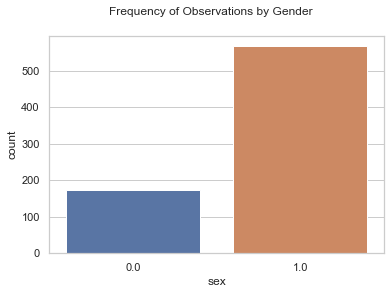

In [66]:
#Gender
#given that gender is a categorical variable, we use a countplot to visualize it
#we always plot the variable of interest on the x axis, and the count or frequency on the y axis

sns.countplot(x='sex', data = df_clean)
plt.suptitle('Frequency of Observations by Gender')  # Way more men than women (0=woman, 1=man)

In [67]:
#Diagnosis
#we check the counts per each value of the variable. sort=False tells pandas not to sort the results by values. 
#normalize = True tells it to return the relative frequencies rather than the absolute counts
#if we had not cleaned the data, we could add parameter dropna=False so that value_counts does not drop null values

df_clean['diagnosis'].value_counts(sort=False, normalize=True)

0    0.481781
1    0.276653
2    0.106613
3    0.105263
4    0.029690
Name: diagnosis, dtype: float64

Text(0.5, 0.98, 'Frequency Distribution of Diagnosis State')

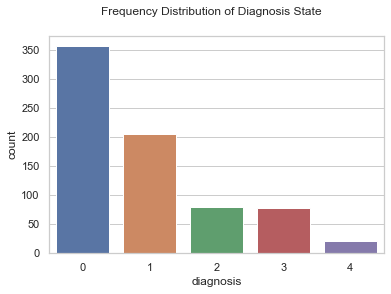

In [68]:
sns.countplot(x='diagnosis', data = df_clean)
plt.suptitle('Frequency Distribution of Diagnosis State')

In [69]:
#The describe request gives us the count, mean, standard deviation, min, max, as well as the quartiles for the
#respective value distribution

df_clean['age'].describe()

count    741.000000
mean      53.099865
std        9.402028
min       28.000000
25%       46.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

Text(0.5, 0.98, 'Distribution of Age')

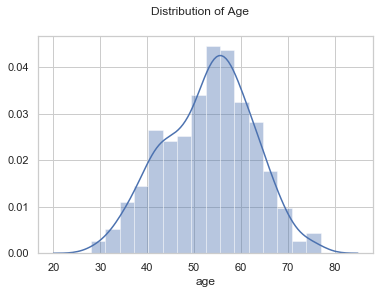

In [70]:
sns.distplot(df_clean['age'])
plt.suptitle('Distribution of Age')

In [71]:
df_clean.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis'],
      dtype='object')

In [72]:
df_clean['max_heart_rate'].describe()

count    741.000000
mean     138.740891
std       25.828809
min       60.000000
25%      120.000000
50%      140.000000
75%      159.000000
max      202.000000
Name: max_heart_rate, dtype: float64

Text(0.5, 0.98, 'Distribution of Maximal Heart Rate')

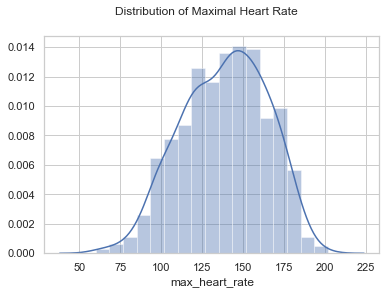

In [73]:
sns.distplot(df_clean['max_heart_rate'])
plt.suptitle('Distribution of Maximal Heart Rate')

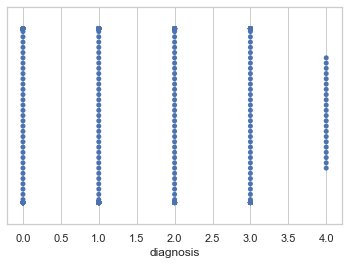

In [74]:
sns.swarmplot('diagnosis', data=df_clean)

In [75]:
# Rules for visualizing two variables (recap).
# Their order does not matter here, hence Q-C and C-Q use the same visualization rule

# C-Q: bivariate bar graph with sns factorplot, categories on x axis, and mean of response variable 
#on y axis Q-Q: scatterplot with sns regplot C-C: you can plot them one a time. problem with a bivariate graph 
#is that mean has no meaning in context of a categorical variable

/Users/Zack/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 0.98, 'Gender v. Age')

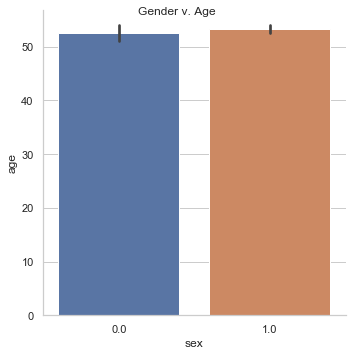

In [76]:
sns.factorplot(x='sex', y='age', kind='bar', data=df_clean)
plt.suptitle('Gender v. Age')

/Users/Zack/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 0.98, 'Gender v. Rest Blood Pressure')

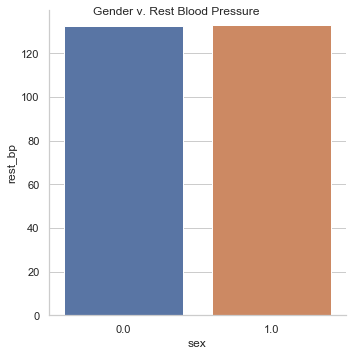

In [77]:
#Categorical explanatory variable 'sex' and quantitative response variable 'rest_bp' ci=None supresses error bars

sns.factorplot(x='sex', y='rest_bp', data=df_clean, kind='bar', ci=None)
plt.suptitle('Gender v. Rest Blood Pressure')

In [78]:
df_clean['chest_pain'].dtype

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0], ordered=False)

In [79]:
df_clean['cholesterol'].dtype

dtype('float64')

Text(0.5, 0.98, 'Gender vs Cholesterol')

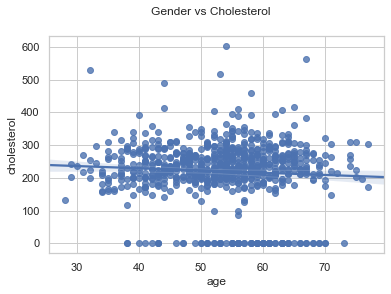

In [80]:
#We use a regplot to plot two quantitative variables, age and cholesterol, while also having a regression line suggesting
#any association present
#we always plot the explanatory variable on the x axis, and the response variable on the y axis
sns.regplot(x='age', y='cholesterol', data=df_clean)
plt.suptitle('Gender vs Cholesterol')

In [81]:
#How can we gain a better idea of how two categorical variables interact?
df_clean.groupby('sex')['diagnosis'].value_counts()/len(df)

sex  diagnosis
0.0  0            0.142391
     1            0.028261
     3            0.008696
     2            0.007609
     4            0.002174
1.0  0            0.245652
     1            0.194565
     2            0.078261
     3            0.076087
     4            0.021739
Name: diagnosis, dtype: float64

Text(0.5, 0.98, 'Cholesterol Level by Gender')

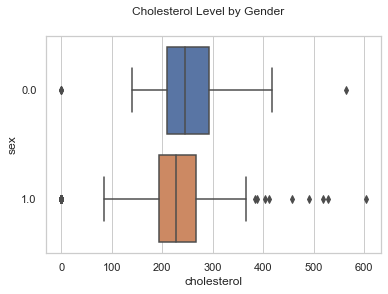

In [82]:
sns.boxplot(x='cholesterol', y='sex', data=df_clean)
plt.suptitle('Cholesterol Level by Gender')

In [83]:
#describing the dataset/the variables of the dataset, after we group the values in the dataset by diagnostic category
#the describe function gives us the key statistics for each quantitative variable in the dataset
df_clean.groupby('diagnosis').describe()


age                                                      rest_bp  \
           count       mean       std   min    25%   50%    75%   max   count   
diagnosis                                                                       
0          357.0  50.302521  9.417789  28.0  43.00  51.0  57.00  76.0   357.0   
1          205.0  52.946341  8.577333  31.0  47.00  54.0  59.00  75.0   205.0   
2           79.0  58.430380  7.041422  42.0  55.00  59.0  63.00  74.0    79.0   
3           78.0  59.179487  7.870285  39.0  54.00  60.0  64.00  77.0    78.0   
4           22.0  59.227273  8.286143  38.0  56.25  60.5  63.75  77.0    22.0   

                       ... max_heart_rate        st_depression            \
                 mean  ...            75%    max         count      mean   
diagnosis              ...                                                 
0          129.871148  ...          168.0  202.0         357.0  0.425210   
1          134.502439  ...          150.0  195.0         205.0  1.088293   
2          135.392405  ...          144.0  180.0          79.0  1.394937   
3          136.102564  ...          140.0  173.0          78.0  1.598718   
4          142.227273  ...          145.0  182.0          22.0  2.363636   

                                                
                std  min   25%  50%   75%  max  
diagnosis                                       
0          0.712199 -0.5  0.00  0.0  0.80  4.2  
1          1.021369  0.0  0.00  1.0  2.00  5.0  
2          1.204787 -1.0  0.00  1.4  2.10  4.0  
3          1.352006  0.0  0.50  1.5  2.15  6.2  
4          1.283798  0.0  1.25  2.5  3.45  4.4  

[5 rows x 40 columns]

In [84]:
#before starting to manipulate the dataset itself, we make a copy, and will work on the copy rather than the original
df_clean_copy = df_clean.copy()

In [85]:
#Moving to inferential statistics

#Hypothesis testing:
    #1. define null hypothesis and alternate hypothesis
    #2. analyze evidence
    #3. interpret results
    
# Typical H0: there is no relationship between the explanatory and response variable 
# Typical H1: there is a statistically significant relationship

# Bivariate statistical tools: 
    #1. ANOVA
    #2. chi-square
    #3. correlation coefficient

# Type 1 vs Type 2 errors 
    # Type 1 error: the incorrect rejection of a true null hypothesis 
    # Type 2 error: retaining a false null hypothesis

# we will test the null hypothesis that age and diagnosis are not related. the type of variables we have 
# (explanatory/response and categorical/quantitative for each) determines the type of statistical tools we will use:

# Explanatory categorical and response quantitative: ANOVA 
# Explanatory categorical and response categorical: Chi Square test 
# Explanatory quantitative and response categorical: classify/bin explanatory variable and use chi square test 
# Explanatory quantitative and response quantitative: pearson correlation

# a result is statistically significant if it is unlikely to be the result of chance

# before performing these analyses, one needs to use the .dropna() function to include only valid data


In [86]:
#Going the wrong way
test1 = smf.ols(formula = 'age ~ C(diagnosis)', data=df_clean_copy).fit() # "C" specifies that the variable is 
#categorical
print(test1.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     28.42
Date:                Fri, 13 Sep 2019   Prob (F-statistic):           5.56e-22
Time:                        11:12:00   Log-Likelihood:                -2658.2
No. Observations:                 741   AIC:                             5326.
Df Residuals:                     736   BIC:                             5350.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            50.3025      0.46

In [87]:
#What interests us in an ANOVA table are: 
    # R squared 
    # The F statistic 
    # The p value (here called 'Prob (F-statistic) 
    # The coefficients of each explanatory variable 
    # and the associated p value for it (here 'coef' and 'P>|t| columns) 
    # The 95% confidence interval for our coefficients. Here called '[95.0% Conf. Int.]

# The 'R Squared' statistic.
#This is a measure of how much of the variability in the response variable (age in this ex),is explained 
# by our model. Here we see it 0.134 only. So diagnostic group only helps us explain 13.4% of the variability in age.
# This can indicate that either we omit important explanatory variables that we can add to the model, 
# or that we miss the structure of the association.

# The F statistic: An F test is any statistical test in which the test statistic has an F distribution under the 
# null hypothesis 
# The F statistic = variation among sample means/variation within sample groups 
# ANOVA F Test = are the differences among the sample means due to true differences among the population means, 
# or merely due to sampling variability

# p value in an ANOVA table = probability of getting an F value as large or larger if H0 is true probability of 
# finding this value if there is no difference between sample means. 
 
# In an ANOVA table, we can decide if the relationship is statistically significant by checking the value of the 
# F statistic against the relevant statistical table, F=28.42 above, or by looking at the p value. The latter is 
# easiest. A long tradition in statistics is to consider a p value (also called alpha) below 0.05 as indicative of 
# a significant relationship. When conducting such tests, you need to decide what p value/alpha value you feel 
# comfortable with, and from then onwards you create a binary framework: either a statistic has an associated p 
# value below the value you decided on at the beginning, or not. In this sense, a p value of 0.0001 is not indicative
# of a 5 times stronger relationship than a p value of 0.0005. In our case here a p value of 5.56e-22 means the 
# relationship is statistically significant (5.56e-22 < 0.05).

# The coefficients for each variable. Here for example our model would be: age = 50.3025 + 2.6438 
# diagnosis1 + 8.1279 diagnosis2 + 8.8770 diagnosis3 + 8.9248 diagnosis4. We can also say that being having
# a diagnosis of 1 increases someone's age by 2.6438 assuming we hold all other explanatory variables in our model 
# constant at 0. a negative but significant coefficient indicates that our explanatory variable and the response 
# variable are negatively associated: as one increases, the other decreases. the higher the coefficient, the more 
# impact it will have on the value of our response variable based on our model. However, these coefficients result 
# from our sample, meaning that the population parameters may differ from these. The confidence intervals give us a 
# range in which these parameters can be for the population, with 95% confidence. For example we can be 95% confident 
# that the population parameter for diagnosis1 is between 1.134 and 4.153.


In [88]:
# Whenever the explanatory variable has more than 2 levels, we also need to perform post hoc statistical tests to 
# better understand the relationship between the explanatory variable and the response variable. We know the groups 
# tested are different overall, but not exactly where/how they are different for explanatory variables with multiples
# levels, F test and p value do not tell us why the group means are not equal, or how. there are many ways in
# which this can be the case.

In [89]:
#Examining the means and standard deviation
grouped1_mean = df_clean_copy.groupby('diagnosis').mean()['age']
print(grouped1_mean)

diagnosis
0    50.302521
1    52.946341
2    58.430380
3    59.179487
4    59.227273
Name: age, dtype: float64


In [90]:
grouped1_std = df_clean_copy.groupby('diagnosis').std()['age']
print(grouped1_std)

diagnosis
0    9.417789
1    8.577333
2    7.041422
3    7.870285
4    8.286143
Name: age, dtype: float64


In [91]:
#Given that we have an explanatory categorical variable with multiple levels, we use the tukey hsd test
#other tests:
    #Holm T
    #Least Significant Differnce (LSD)
    
tukey1 = multi.MultiComparison(df_clean_copy['age'], df_clean_copy['diagnosis'])
res1 = tukey1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   2.6438 0.0056  0.5412  4.7464   True
     0      2   8.1279  0.001  5.1446 11.1111   True
     0      3    8.877  0.001  5.8781 11.8758   True
     0      4   8.9248  0.001   3.654 14.1955   True
     1      2    5.484  0.001  2.3067  8.6614   True
     1      3   6.2331  0.001  3.0411  9.4252   True
     1      4   6.2809 0.0128   0.898 11.6639   True
     2      3   0.7491    0.9 -3.0808   4.579  False
     2      4   0.7969    0.9 -4.9872  6.5809  False
     3      4   0.0478    0.9 -5.7443  5.8399  False
----------------------------------------------------


In [92]:
# We will now test another hypothesis:
# Hypothesis(0)(a): the presence of chest pain and the diagnosis (0 or 1) are independent
# Alternative Hypothesis 1: presence of chest pain and diagnosis are not independent

In [93]:
diagnosis_dic = {0:0, 1:1, 2:1, 3:1, 4:1,}
df_clean_copy['diagnosis_binary'] = df_clean_copy['diagnosis'].map(diagnosis_dic)

In [94]:
df_clean_copy['diagnosis_binary'].value_counts()

1    384
0    357
Name: diagnosis_binary, dtype: int64

In [95]:
#contingency table of observed counts
#the crosstab function allows us to cross one variable with another
#when creating contingency tables, we put the response variable first (therefore vertical in table), 
#and the explanatory variable second, therefore horizontal at the top of the table.

continTable1 = pd.crosstab(df_clean_copy['diagnosis_binary'], df_clean_copy['chest_pain'])
print(continTable1)

chest_pain        1.0  2.0  3.0  4.0
diagnosis_binary                    
0                  23  128  112   94
1                  15   22   49  298


In [96]:
#Column Percentage
colsum = continTable1.sum(axis=0)
colpct = continTable1/colsum
print(colpct)

chest_pain             1.0       2.0       3.0       4.0
diagnosis_binary                                        
0                 0.605263  0.853333  0.695652  0.239796
1                 0.394737  0.146667  0.304348  0.760204


In [97]:
#chi square test
#Expected counts: p assuming events are independent. p(1) * p(2) | column total*row total/table total
#Chi square statistic summarizes this. difference between our obersavtion and what we would expect if H0 is true
#We rely on the p value, as different distributions define whether the chi square itself is large or not

print('chi-square value, p value, expected counts')
cs1 = scipy.stats.chi2_contingency(continTable1)
print(cs1)

chi-square value, p value, expected counts
(206.69693667917477, 1.5066891002705367e-44, 3, array([[ 18.30769231,  72.26720648,  77.56680162, 188.8582996 ],
       [ 19.69230769,  77.73279352,  83.43319838, 203.1417004 ]]))


In [98]:
#Explanatory variable with multiple levels:
#we would have to do a pairwise comparison between every two groups of the explanatory variable vs the response 
#variable. This would be a Bonferroni adjustment - we adjust p value, we use by number of pairwise comparisons

In [99]:
df_clean_copy.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis', 'diagnosis_binary'],
      dtype='object')

In [100]:
continTable2 = pd.crosstab(df_clean_copy['diagnosis_binary'], df_clean_copy['sex'])
print(continTable2)

sex               0.0  1.0
diagnosis_binary          
0                 131  226
1                  43  341


In [101]:
#Column Percentage
colsum2 = continTable2.sum(axis=0)
colpct2 = continTable2/colsum2
print(colpct2)

sex                    0.0       1.0
diagnosis_binary                    
0                 0.752874  0.398589
1                 0.247126  0.601411


In [102]:
#Chi-Square Test
print('chi-square value, p value, expected counts')
cs2 = scipy.stats.chi2_contingency(continTable2)
print(cs2)

chi-square value, p value, expected counts
(65.52382346167634, 5.741569147761909e-16, 1, array([[ 83.82995951, 273.17004049],
       [ 90.17004049, 293.82995951]]))


In [103]:
#Moderators
#a moderator is a third variable that affects the direction and/or strength between your explanatory and response
#variables. #The question is, is our response variable associated with our explanatory variable, for each level 
#of our third variable?

#Other types of variables:
    # Confounding variable
    # Lurking variable

In [104]:
#let's see if sex is a moderator in the statistically significant relationship between chest pain and diagnosis

df_clean_copy_men = df_clean_copy[df_clean_copy['sex'] == 0]
len(df_clean_copy_men)

174

In [105]:
df_clean_copy_women = df_clean_copy[df_clean_copy['sex'] == 1]
len(df_clean_copy_women)

567

In [106]:
#contingency table of observed counts
#when creating contingency tables, we put the response variable first (therefore vertical in table), 
#and the explanatory variable second, therefore horizontal at the top of the table.

continTable3 = pd.crosstab(df_clean_copy_men['diagnosis_binary'], df_clean_copy_men['chest_pain'])
print(continTable3)

chest_pain        1.0  2.0  3.0  4.0
diagnosis_binary                    
0                   9   47   44   31
1                   0    4    6   33


In [107]:
#Column Percentage
colsum3 = continTable3.sum(axis=0)
colpct3 = continTable3/colsum3
print(colpct3)

chest_pain        1.0       2.0   3.0       4.0
diagnosis_binary                               
0                 1.0  0.921569  0.88  0.484375
1                 0.0  0.078431  0.12  0.515625


In [108]:
#Chi-Square Test
print('chi-square value, p value, expected counts')
cs3 = scipy.stats.chi2_contingency(continTable3)
print(cs3)

chi-square value, p value, expected counts
(39.896349270579876, 1.1207983387044401e-08, 3, array([[ 6.77586207, 38.39655172, 37.64367816, 48.18390805],
       [ 2.22413793, 12.60344828, 12.35632184, 15.81609195]]))


In [109]:
continTable4 = pd.crosstab(df_clean_copy_women['diagnosis_binary'], df_clean_copy_women['chest_pain'])
print(continTable4)

chest_pain        1.0  2.0  3.0  4.0
diagnosis_binary                    
0                  14   81   68   63
1                  15   18   43  265


In [110]:
#Column Percentage
colsum4 = continTable4.sum(axis=0)
colpct4 = continTable4/colsum4
print(colpct4)

chest_pain             1.0       2.0       3.0       4.0
diagnosis_binary                                        
0                 0.482759  0.818182  0.612613  0.192073
1                 0.517241  0.181818  0.387387  0.807927


In [111]:
#Chi-Square Test
print('chi-square value, p value, expected counts')
cs4 = scipy.stats.chi2_contingency(continTable4)
print(cs4)

chi-square value, p value, expected counts
(153.13334878752136, 5.556477341199484e-33, 3, array([[ 11.55908289,  39.46031746,  44.24338624, 130.7372134 ],
       [ 17.44091711,  59.53968254,  66.75661376, 197.2627866 ]]))


In [112]:
df_clean_copy_women.groupby('chest_pain')['diagnosis'].value_counts()

chest_pain  diagnosis
1.0         0             14
            1              9
            2              3
            3              2
            4              1
2.0         0             81
            1             14
            2              2
            3              2
3.0         0             68
            1             22
            3             11
            2              8
            4              2
4.0         1            134
            0             63
            2             59
            3             55
            4             17
Name: diagnosis, dtype: int64

In [113]:
#The relationship between chest pain and the diagnosis holds for both levels of the sex variables, hence it is not 
#a moderator. We would test for moderator variables in the case of a quantitative response variable the same way:

    #divide the population into the sublevels of the third variables
    # conduct an smf.ols test for each to see if the relationship is statistically significant for each level
    
# Identifying a confounding variable does not allow to establish causation, just to get closer to a causal 
# connection. Due to infinite number of possible lurking variables, observational studies cannot rely establish 
# causation 
# A lurking or confounding variable is a third variable that is associated with both the explanatory and 
# response variables. i.e. x=firefighters; y=damage caused by a fire. plot would suggest more firefighters causes 
# more fire damage. in reality there is a third confounding variable that influences both, seriousness of the fire. 
# In a study we want to demonstrate that our statistical relationship is valid even after controlling for confounders.

# Now we will test whether there is a relationship between two quantitative variables, age and cholesterol.
# Using the pearson correlation test r, going from -1 to 1 only tells us whether the two variables are linearly
# related. They may be related in nonlinear ways, therefore it's always important to look at r in parallel with a 
# scatterplot of the two variables; r squared is a measure of how much variability in one variable can be explained 
# by the other variable. To calculate the pearson coefficient we need to remove all missing values. Please remember 
# that when two variables are correlated it is possible that: X causes Y or Y causes X, Z causes both X and Y, X 
# and Y are correlated by chance - a spurious correlation



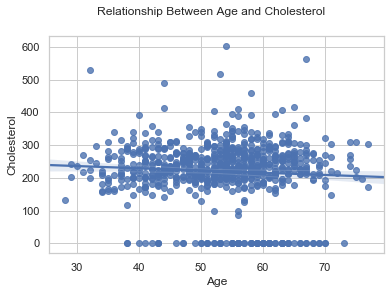

In [114]:
scat1 = sns.regplot(x='age', y='cholesterol', fit_reg = True, data = df_clean_copy)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.suptitle('Relationship Between Age and Cholesterol')
scat1

In [115]:
#the r coefficient is a measure of association, of how closely points are clustered around a line
#correlations are always between -1 and 1
#r measures solely linear association
#association, not causation
#it is a number without units
#it can mislead in presence of outliers or non linear association -> always draw a scatter plot as well and check visually
#when you look at a scatter plot you look at direction form and strength of relationship
#if you identify a nonlinear association, with one or more curves, then you know you ought to add nonlinear explanatory
#variables to your regression model, to aim to capture this nonlinear association as well.
#ecological correlations based on averages can be misleading and overstate strength of associations for individual 
#units

print('Association Between Age and Cholesterol')
print(scipy.stats.pearsonr(df_clean_copy['age'], df_clean_copy['cholesterol']))


Association Between Age and Cholesterol
(-0.06816955218094611, 0.06364050870484293)


In [116]:

# Linear Regression:
# multivariate linear regression for quantitative response variable. Logistic regression for binary categorical 
# response variable

# Assumptions of these types of models:

    # Normality: residuals from our linear regression model are normally distributed. 
    #     If they are not, our model  may be misspecified.

    # Linearity: association between explanatory and response variable is linear.

    # Homoscedasticity (or assumption of constant variance): variability in the response variable is the same at 
    # all levels of the explanatory variable. i.e. if residuals are spread around the regression line in a similar
    # manner as you move along the x axis (values of the explanatory variable)

    # Independence: observations are not correlated with each other. Longitudinal data can violate this assumption, 
    # as well as hierarchical nesting/clustering data i.e. looking at students by classes. this assumption is the 
    # most serious to be violated, and also cannot be fixed by modifying the variables. The data structure itself is
    # the problem.

# We have to contend with:

    # Multicollinearity: explanatory variables are highly correlated with each other. this can mess up your parameter 
    # estimates or make them highly unstable. Signs:

        # Highly associated variable not significant.
        # Negative regression coefficient that should be positive
        # Taking out an explanatory variable drastically changes the results
        # Outliers can affect your regression line

# Multiple regression model allows us to find the relationship between one explanatory variable and the reponse 
# variable, while controlling (holding constant at 0) all the other variables. for interpretability of our model, 
# each variable needs to include a meaningful value of 0, so as to make it easier to interpret the coefficients 
# (what does it mean to hold cholesterol constant at 0 if its range has no value of 0?) for a categorical variable, 
# we can just recode one of the values to be 0. For a quantitative variable, we have to center it. 
# Centering = subtracting the mean of a variable from the value of the variable. We are therefore recoding it 
# so that its mean=0. if a quantitative explanatory variable includes a meaningful value of 0 already, we may not
# need to center it. in linear regression we only center explanatory variables not response one, in logistic 
# regression we always need to code response binary variable so that 0 means no outcome and 1 outcome occurred, this
# is true whether outcome is positive or negative.

# We will create a multiple regression model, investigating the relationship between our explanatory variables 
# and our response variable diagnosis. We will first center the explanatory variables. For categorical variables, 
# one of the categories needs to be 0, for quantitative variables, we need to subtract the mean from each value.

# Notes: do not center the response variable. is using logistic regression, do recode the binary response variable 
# to make sure one class is coded as 0

In [117]:
df_clean_copy.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis', 'diagnosis_binary'],
      dtype='object')

In [118]:
#categorical variables: sex, chest_pain, fasting_bs, rest_ecg, exercise_angina
#quantitative variables: age, rest_bp, cholesterol, max_heart_rate, st_depression

In [119]:
#Before getting into multilinear regression, it's good to recall variables.
df_clean_copy['chest_pain'].value_counts()

4.0    392
3.0    161
2.0    150
1.0     38
Name: chest_pain, dtype: int64

In [120]:
recode_chest_pain = {1:0, 2:1, 3:2, 4:3}
df_clean_copy['chest_pain_p'] = df_clean_copy['chest_pain'].map(recode_chest_pain)

In [121]:
df['fasting_bs'].value_counts()

0.0    692
1.0    138
Name: fasting_bs, dtype: int64

In [122]:
df['rest_ecg'].value_counts()

0.0    551
2.0    188
1.0    179
Name: rest_ecg, dtype: int64

In [123]:
df['exercise_angina'].value_counts()

0.0    528
1.0    337
Name: exercise_angina, dtype: int64

In [124]:
df_clean_copy['age_c'] = df_clean_copy['age'] - df_clean_copy['age'].mean()

In [125]:
df_clean_copy['rest_bp_c'] = df_clean_copy['rest_bp'] - df_clean_copy['rest_bp'].mean()

In [126]:
df_clean_copy['cholesterol_c'] = df_clean_copy['cholesterol'] - df_clean_copy['cholesterol'].mean()

In [127]:
df_clean_copy['max_heart_rate_c'] = df_clean_copy['max_heart_rate'] - df_clean_copy['max_heart_rate'].mean()

In [128]:
df_clean_copy['st_depression_c'] = df_clean_copy['st_depression'] - df_clean_copy['st_depression'].mean()

In [129]:
df_clean_copy.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis', 'diagnosis_binary', 'chest_pain_p', 'age_c', 'rest_bp_c',
       'cholesterol_c', 'max_heart_rate_c', 'st_depression_c'],
      dtype='object')

In [130]:
df_clean_copy_c = df_clean_copy[['sex','fasting_bs',
     'rest_ecg', 'exercise_angina', 'diagnosis_binary', 'chest_pain_p', 'age_c', 'rest_bp_c',
       'cholesterol_c', 'max_heart_rate_c', 'st_depression_c']]

In [131]:
df_clean_copy_c.columns

Index(['sex', 'fasting_bs', 'rest_ecg', 'exercise_angina', 'diagnosis_binary',
       'chest_pain_p', 'age_c', 'rest_bp_c', 'cholesterol_c',
       'max_heart_rate_c', 'st_depression_c'],
      dtype='object')

In [132]:
model1 = smf.ols(formula = 'age_c ~ sex', data = df_clean_copy_c).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  age_c   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8054
Date:                Fri, 13 Sep 2019   Prob (F-statistic):              0.370
Time:                        11:12:02   Log-Likelihood:                -2711.1
No. Observations:                 741   AIC:                             5426.
Df Residuals:                     739   BIC:                             5435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5596      0.713     -0.785      0.4

In [133]:
model2 = smf.ols(formula = 'age_c ~ sex + cholesterol_c', data = df_clean_copy_c).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  age_c   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.889
Date:                Fri, 13 Sep 2019   Prob (F-statistic):              0.152
Time:                        11:12:02   Log-Likelihood:                -2709.6
No. Observations:                 741   AIC:                             5425.
Df Residuals:                     738   BIC:                             5439.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3644      0.721     -0.506

In [134]:
model3 = smf.ols(formula = 'age_c ~ sex + C(chest_pain_p) + (rest_bp_c) + cholesterol_c +fasting_bs + C(rest_ecg) + \
                            max_heart_rate_c + exercise_angina + st_depression_c + diagnosis_binary', 
                            data = df_clean_copy_c).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  age_c   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     21.58
Date:                Fri, 13 Sep 2019   Prob (F-statistic):           1.25e-43
Time:                        11:12:02   Log-Likelihood:                -2590.6
No. Observations:                 741   AIC:                             5209.
Df Residuals:                     727   BIC:                             5274.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [135]:
# We identified some explanatory variables that are associated with age, but our model overall barely explains 
# 27% of the variation in the response variable.
# let's run some diagnostics

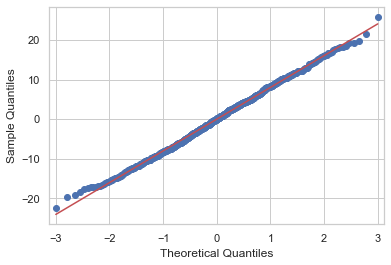

In [136]:
#Q-Q plot for normality

figure1 = sm.qqplot(model3.resid, line = 'r')

#red line represents residuals we would expect if model residuals were normally distributed
#our residuals below deviate somewhat from red line, especially at lower and higher quantiles, meaning they do not
#follow a normal distribution. This means the curvilinear association in our model is not fully explained by our model.
#We could add more explanatory variables in this case to try to better explain any curvilinear association.

Text(0.5, 0, 'Observation Number')

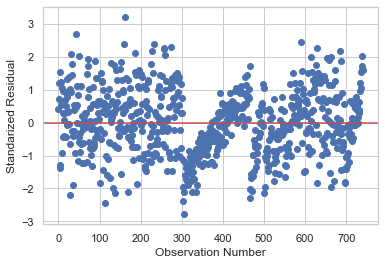

In [137]:
#Simple plot of residuals
stdResidual = pd.DataFrame(model3.resid_pearson)
plt.plot(stdResidual, 'o', ls = 'None')
line1 = plt.axhline(y=0, color='r')
plt.ylabel('Standarized Residual')
plt.xlabel('Observation Number')
# stdResidual.plot(figsize=(10,10));

#resid_pearson normalizes our model's residuals
#ls='none' means points will not be connected

#we expect most residuals to fall within 2sd of the mean. More than 2 indicate there are outliers, and more than 3 
#extreme outliers.
#if more than 1% of our observations have standardized residuals with an absolute value greater than 2.5, or more than 5%
#have one greater than or equal to 2, there is evidence that the fit of the model is poor. top cause of this is 
#ommission of important explanatory variables in our model.

#standardized residuals in linear regression will always be linear, and the line will be horizontal

#normalizing or standardizing residuals amounts to making them have a mean of 0 and sd of 1 so as to fit a normal 
#standard distribution

#if residuals show a strong pattern (up, down, polynomial) then it is a good indication of nonlinearity
#in the underlying relationship

Figure(432x288)


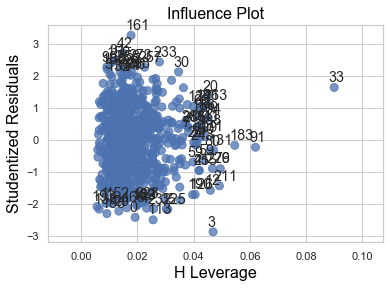

In [138]:
#Leverage Plot
figure2 = sm.graphics.influence_plot(model3, size=8)
print(figure2)

#leverage, always between 0 and 1. At 0, a standardized residual has no influence on our model.
#leverage is a measure of how much influence a specific residual (and therefore observation) has on our model.
#we see that we have extreme outliers, but they are low leverage, meaning they do not have an undue influence on our
#estimation of the regression model.
#we have an observation that is both high leverage and and outlier, observation 33. We would need to further investigate
#the corresponding observation.

In [139]:
#now let's focus on our actual response variable in the study
#since it is a binary variable, we will need to use a logistic regression model

In [140]:
lreg1 = smf.logit(formula = 'diagnosis_binary ~ (chest_pain_p)', data = df_clean_copy_c).fit()
print(lreg1.summary())

Optimization terminated successfully.
         Current function value: 0.577928
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       diagnosis_binary   No. Observations:                  741
Model:                          Logit   Df Residuals:                      739
Method:                           MLE   Df Model:                            1
Date:                Fri, 13 Sep 2019   Pseudo R-squ.:                  0.1654
Time:                        11:12:05   Log-Likelihood:                -428.24
converged:                       True   LL-Null:                       -513.13
Covariance Type:            nonrobust   LLR p-value:                 8.302e-39
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.5739      0.254    -10.120      0.000      -3.072      -2.075
chest_pain_p     1.1671

In [141]:
#again, normally we would add variables one at a time, but here we will go faster.
lreg2 = smf.logit(formula = 'diagnosis_binary ~ age_c + sex + C(chest_pain_p) + cholesterol_c', data = df_clean_copy_c).fit()
print(lreg2.summary())

Optimization terminated successfully.
         Current function value: 0.488979
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       diagnosis_binary   No. Observations:                  741
Model:                          Logit   Df Residuals:                      734
Method:                           MLE   Df Model:                            6
Date:                Fri, 13 Sep 2019   Pseudo R-squ.:                  0.2939
Time:                        11:12:05   Log-Likelihood:                -362.33
converged:                       True   LL-Null:                       -513.13
Covariance Type:            nonrobust   LLR p-value:                 3.728e-62
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.6537      0.408     -4.058      0.000      -2.452      -0.855

In [142]:
lreg3 = smf.logit(formula = 'diagnosis_binary ~ age_c + sex + C(chest_pain_p) + rest_bp_c + \
                  cholesterol_c + fasting_bs + C(rest_ecg) + max_heart_rate_c + \
                  exercise_angina + st_depression_c', data = df_clean_copy_c).fit()
print(lreg3.summary())

Optimization terminated successfully.
         Current function value: 0.421593
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       diagnosis_binary   No. Observations:                  741
Model:                          Logit   Df Residuals:                      727
Method:                           MLE   Df Model:                           13
Date:                Fri, 13 Sep 2019   Pseudo R-squ.:                  0.3912
Time:                        11:12:05   Log-Likelihood:                -312.40
converged:                       True   LL-Null:                       -513.13
Covariance Type:            nonrobust   LLR p-value:                 1.100e-77
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.9267      0.465     -4.139      0.000      -2.839      

In [143]:
#however, for logistic regression it makes much more sense to calculate the odds ratio
#this is because in binary logistic regression, we only deal with probabilities, of an outcome (response variable) 
#being 0 or 1.
#odds are calculated as the exponentiation of our coefficients as calculated in a normal ANOVA table.

#Odds ratio (OR) for an explanatory variable:
#if OR=1, there is no association meaningful association between explanatory and response variables
#if OR<1, the response variable becomes less likely as the explanatory one increases
#if OR>1, the response variable becomes more likely as the explanatory one increases

print('Odds Ratios')
print(np.exp(lreg3.params))

#Interpretation of OR
#Here we would say that based on our sample, women were 3.7 times more likely than men to have a diagnosis of 1.

Odds Ratios
Intercept                 0.145625
sex[T.1.0]                3.706415
C(chest_pain_p)[T.1]      0.573894
C(chest_pain_p)[T.2]      0.868495
C(chest_pain_p)[T.3]      3.672428
fasting_bs[T.1.0]         1.662336
C(rest_ecg)[T.1.0]        0.916029
C(rest_ecg)[T.2.0]        1.263268
exercise_angina[T.1.0]    2.732984
age_c                     1.021933
rest_bp_c                 1.006246
cholesterol_c             0.998173
max_heart_rate_c          0.985909
st_depression_c           1.851057
dtype: float64


In [144]:
params = lreg3.params
conf = lreg3.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI','OR']
print(np.exp(conf))

#We have 95% confidence that the sex odds ratio will be between 2.24 and 6.12

                        Lower CI  Upper CI        OR
Intercept               0.058480  0.362629  0.145625
sex[T.1.0]              2.242497  6.125988  3.706415
C(chest_pain_p)[T.1]    0.224975  1.463965  0.573894
C(chest_pain_p)[T.2]    0.364589  2.068857  0.868495
C(chest_pain_p)[T.3]    1.580165  8.535010  3.672428
fasting_bs[T.1.0]       0.938503  2.944433  1.662336
C(rest_ecg)[T.1.0]      0.506524  1.656603  0.916029
C(rest_ecg)[T.2.0]      0.769914  2.072760  1.263268
exercise_angina[T.1.0]  1.737951  4.297705  2.732984
age_c                   0.997020  1.047468  1.021933
rest_bp_c               0.995035  1.017583  1.006246
cholesterol_c           0.995907  1.000445  0.998173
max_heart_rate_c        0.977157  0.994740  0.985909
st_depression_c         1.480481  2.314391  1.851057


In [145]:
#Statsmodels and scikit learn still offer few and poor 'off the shelf' options for imputing missing values in more
#statistically sound ways.
#As of statsmodels 0.8.0 at least, statsmodels offers the MICE imputation function
#a description is available here: http://www.statsmodels.org/dev/imputation.html
#and the details behind the implementation are here: 
#http://www.statsmodels.org/dev/_modules/statsmodels/imputation/mice.html
#to be able to use MICE you will need to update the statsmodels coming with Anaconda, to 0.8.0
#I am yet to find nice tutorials/examples of the mice function
#Let's create here a dataset with some missing values for one of our variables

df_clean_mice = df_red[df_red['rest_bp'].notnull() & df_red['cholesterol'].notnull() & df_red['fasting_bs'].notnull() & \
                  df['max_heart_rate'].notnull() & df['exercise_angina'].notnull()]

In [146]:
df_clean_mice.isnull().any()

age                False
sex                False
chest_pain         False
rest_bp            False
cholesterol        False
fasting_bs         False
rest_ecg           False
max_heart_rate     False
exercise_angina    False
st_depression       True
diagnosis          False
dtype: bool

In [147]:
df_clean_mice.describe()

age     rest_bp  cholesterol  max_heart_rate  st_depression
count  745.000000  745.000000   745.000000      745.000000     741.000000
mean    53.130201  132.771812   219.923490      138.817450       0.893117
std      9.392743   18.599746    93.713004       25.825905       1.086922
min     28.000000    0.000000     0.000000       60.000000      -1.000000
25%     46.000000  120.000000   197.000000      120.000000       0.000000
50%     54.000000  130.000000   231.000000      140.000000       0.500000
75%     60.000000  140.000000   271.000000      160.000000       1.500000
max     77.000000  200.000000   603.000000      202.000000       6.200000

In [148]:
#we create a dataframe with only quantitative variables

df_clean_mice = df_clean_mice[['age', 'rest_bp', 'cholesterol', 'max_heart_rate', 'st_depression']]

In [149]:
import statsmodels.imputation.mice as mice
import statsmodels
from statsmodels.base.model import LikelihoodModelResults
from statsmodels.regression.linear_model import OLS
from collections import defaultdict

#we wrap our dataframe in a MICEData object
imp = mice.MICEData(df_clean_mice)

#we specify our analysis model
formula_mice = 'diagnosis_binary ~ age + rest_bp + cholesterol + max_heart_rate + st_depression_c'

#We now take the MICEData object, and the formula specification and run both the imputation and the analysis
mice = mice.MICE(formula_mice, smf.logit, imp)

#various plots and summary statistics are available and/or being developed with the MICE package.

In [150]:
# Machine learning for data exploration
# For me machine learning is simply the branch of statistics that has traditionally focused on working with large, 
# heterogenous datasets, characterized by numerous variables that interact in nonlinear ways. It is a collection 
# of tools, just like statistics in general.

# An amazing article on traditional parametric statistics vs machine learning is: "Statistical Modeling: The Two 
# Cultures," Leo Breiman, 2001.

# Machine learning can be used for:

#     regression
#     classification
#     feature engineering and/or selection

# Accuracy = test error rate. The rate at which an algorithm correctly classifies or estimates. Goal is to minimize 
# test error rate. (in linear regression, which we saw before, accuracy was the mean squared error) 
# (in logistic regression: accuracy = how well the model classifies observations)

# Supervised vs unsupervised learning In supervised learning we work with labeled data In unsupervised learning 
# we aim to find patterns in unlabeled data

# In machine learning we will regularly face the bias-variance trade off: Variance = change in parameter estimates
# across different data sets Bias = how far off model estimated values are from true values ideally we want 
# low variance and low bias, but they are negatively associated. As one decreases, the other increases. Generally, 
# as complexity of model increases, this leads to higher variance and lower bias Simple models will have lower 
# variance, but also be more biased.


# In the data exploration phase, you would use very raw, off the shelf, machine learning algorithms, simply 
# for exploratory/descriptive purposes

# Decision trees

# Note: decision trees cannot handle missing data!

In [151]:
df_clean_copy.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis', 'diagnosis_binary', 'chest_pain_p', 'age_c', 'rest_bp_c',
       'cholesterol_c', 'max_heart_rate_c', 'st_depression_c'],
      dtype='object')

In [152]:
#although decision trees and random forests are particularly suitable for dealing with 
# categorical variables, and in
#many statistical packages we can input the categorical variables directly, because 
# of how they are implemented in
#scikit learn, in this package we cannot input categorical variables directly. We first 
# have to encode them in a 
#process called one hot encoding. This creates a separate column (variable) for each 
# value of our explanatory
#categorical variable. For this we use pandas' get_dummies function

df_sex = pd.get_dummies(df_clean_copy['sex'], prefix = 'sex')

In [153]:
df_chest_pain = pd.get_dummies(df_clean_copy['chest_pain'], prefix = 'chest_pain')
df_fasting_bs = pd.get_dummies(df_clean_copy['fasting_bs'], prefix = 'fasting_bs')
df_rest_ecg = pd.get_dummies(df_clean_copy['rest_ecg'], prefix = 'rest_ecg')
df_exercise_angina = pd.get_dummies(df_clean_copy['exercise_angina'], prefix='exercise_angina')

In [154]:
df_merged = pd.concat([df_clean_copy, df_sex, df_chest_pain, df_fasting_bs, df_rest_ecg, df_exercise_angina], axis=1)

In [155]:
df_merged.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis', 'diagnosis_binary', 'chest_pain_p', 'age_c', 'rest_bp_c',
       'cholesterol_c', 'max_heart_rate_c', 'st_depression_c', 'sex_0.0',
       'sex_1.0', 'chest_pain_1.0', 'chest_pain_2.0', 'chest_pain_3.0',
       'chest_pain_4.0', 'fasting_bs_0.0', 'fasting_bs_1.0', 'rest_ecg_0.0',
       'rest_ecg_1.0', 'rest_ecg_2.0', 'exercise_angina_0.0',
       'exercise_angina_1.0'],
      dtype='object')

In [156]:
df_dt = df_merged[['age', 'sex_0.0', 'sex_1.0', 'chest_pain_1.0', 'chest_pain_2.0', 'chest_pain_3.0', \
                       'chest_pain_4.0', 'rest_bp', 'cholesterol', 'fasting_bs_0.0', 'fasting_bs_1.0', \
                      'rest_ecg_1.0', 'rest_ecg_2.0', 'max_heart_rate', 'exercise_angina_0.0', 'exercise_angina_1.0',\
                       'st_depression', 'diagnosis_binary']]

In [157]:
#here we select as predictors all variables in our dataset expect for the response one
predictors = df_dt.ix[:, df_dt.columns != 'diagnosis_binary']

/Users/Zack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [158]:
predictors.head(5)

age  sex_0.0  sex_1.0  chest_pain_1.0  chest_pain_2.0  chest_pain_3.0  \
0  63.0        0        1               1               0               0   
1  67.0        0        1               0               0               0   
2  67.0        0        1               0               0               0   
3  37.0        0        1               0               0               1   
4  41.0        1        0               0               1               0   

   chest_pain_4.0  rest_bp  cholesterol  fasting_bs_0.0  fasting_bs_1.0  \
0               0    145.0        233.0               0               1   
1               1    160.0        286.0               1               0   
2               1    120.0        229.0               1               0   
3               0    130.0        250.0               1               0   
4               0    130.0        204.0               1               0   

   rest_ecg_1.0  rest_ecg_2.0  max_heart_rate  exercise_angina_0.0  \
0             0             1           150.0                    1   
1             0             1           108.0                    0   
2             0             1           129.0                    0   
3             0             0           187.0                    1   
4             0             1           172.0                    1   

   exercise_angina_1.0  st_depression  
0                    0            2.3  
1                    1            1.5  
2                    1            2.6  
3                    0            3.5  
4                    0            1.4

In [159]:
#we select as the target our response variable
target = df_dt['diagnosis_binary']

In [160]:
#we create our training and testing datasets. Each will have its predictors and its target (response variable).
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size = 0.4)


In [161]:
print(pred_train.shape, pred_test.shape, tar_train.shape, tar_test.shape)

(444, 17) (297, 17) (444,) (297,)


In [162]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(pred_train, tar_train)

In [163]:
predictions = classifier.predict(pred_test)

In [164]:
sklearn.metrics.confusion_matrix(tar_test, predictions)

array([[105,  56],
       [ 48,  88]])

In [165]:
#let's look at which of our variables it considers most important:
print(classifier.feature_importances_)

[0.1189927  0.00293977 0.00152238 0.         0.0115517  0.
 0.25142985 0.11154157 0.17365671 0.00685072 0.0238923  0.01515034
 0.02073506 0.13480416 0.06005122 0.0062164  0.06066514]


In [166]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.6498316498316499

In [167]:
# Random forests

# Random forests, an ensemble learning method, are a more sophisticated method of using trees 
# Pioneered by Tin Kam Ho, Leo Breiman

In [168]:
classifier2 = RandomForestClassifier(n_estimators = 25)
classifier2 = classifier2.fit(pred_train, tar_train)

In [169]:
predictions2 = classifier2.predict(pred_test)

In [170]:
sklearn.metrics.confusion_matrix(tar_test, predictions2)

array([[123,  38],
       [ 32, 104]])

In [171]:
#let's look at which of our variables the random forest considers most important:
#(these follow the order in which we input them to the random forest i.e. our dataset)
print(classifier2.feature_importances_)

[0.12443396 0.02061262 0.01640252 0.01265398 0.03582336 0.02526234
 0.10536386 0.10717715 0.11912645 0.01473555 0.01620228 0.01783059
 0.01778575 0.13698174 0.11349151 0.03059844 0.08551789]


In [172]:
sklearn.metrics.accuracy_score(tar_test, predictions2)

0.7643097643097643

In [173]:
classifier3 = svm.SVC()
classifier3 = classifier3.fit(pred_train, tar_train)
predictions3 = classifier3.predict(pred_test)

/Users/Zack/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [174]:
sklearn.metrics.confusion_matrix(tar_test, predictions3)

array([[  5, 156],
       [  5, 131]])

In [175]:

sklearn.metrics.accuracy_score(tar_test, predictions3) * 100

45.79124579124579

In [176]:
# we obtain a relatively low accuracy - once more, as for random forests, the more complex a machine learning 
# tool is, the more work we will need to do in order to adapt it to our problem and hopefully reach a high accuracy
# for our model